In [211]:
#Membros: Guilherme Guidi, Guilherme Leite, Leonardo Neves
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy import stats
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from numpy import *
import seaborn as sns


**Dado o número de mortes de um ataque terrorista, qual é o tipo de arma mais provavel de ter sido ultilizada.**
#Regressão Logística

In [212]:

data = pd.read_csv('globalterrorismdb_0617dist.csv', encoding='latin1')
col = data.columns.values #Conteudo de cada coluna
col

C:\Users\Usuario\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3',
       'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3',
       'in

In [213]:
df=data[['weaptype1','nkill','nwound','weaptype1_txt']]
#for linha in range(1+len(df)):
   # print(nunndf.nkill[linha])
   # if nunndf.nkill[linha] == 0:
     #   if nunndf.nwound[linha]==0:
      #      df.drop([linha])


In [214]:
nndf = df[pd.notnull(df.weaptype1)&pd.notnull(df.nkill)&pd.notnull(df.nwound)]#Tira os "NaN" do df
nndf.isnull().sum()
print(nndf.weaptype1[:1])

0    13
Name: weaptype1, dtype: int64


In [229]:
nunndf = nndf[nndf.weaptype1 != 13] #tira as armas "Unknown" do df

dfTr = nunndf.sample(5000) #separa as linhas que serao usadas para o treinamento
dfTe = nunndf.sample(100) #separa as linhas que serao usadas para o teste

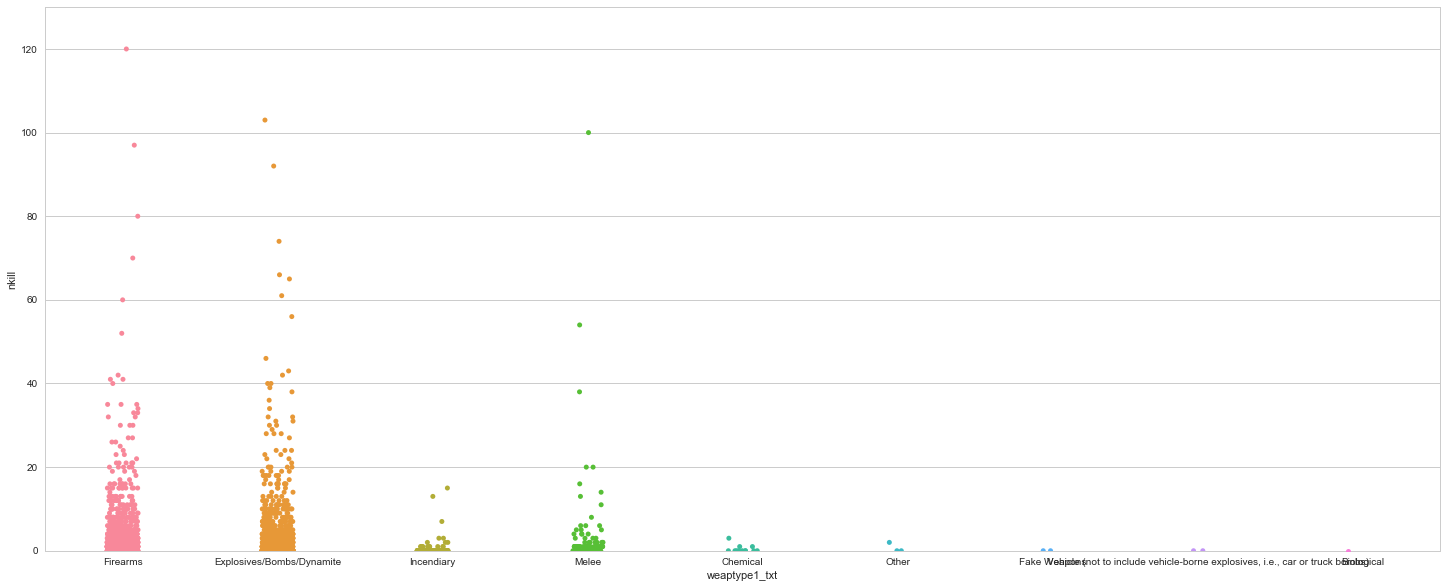

In [220]:
sns.set(style="whitegrid", color_codes=True)
a4_dims = (25, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_context("talk")
sns.plt.ylim(0, 130)# Esse intervalo contem a grande maioria dos dados, o limite foi colocado para uma mulhor compreesão da
                    # distribuição

sns.stripplot(x="weaptype1_txt", y="nkill", data=dfTr, jitter=True);


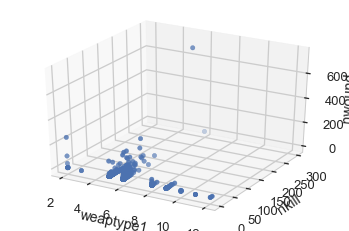

In [230]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
threedee = plt.figure().gca(projection='3d')
threedee.scatter(dfTr['weaptype1'], dfTr['nkill'], dfTr['nwound'])
threedee.set_xlabel('weaptype1')
threedee.set_ylabel('nkill')
threedee.set_zlabel('nwound')
plt.show()

In [223]:
#Z = dfTr['nwound']
Y = dfTr['weaptype1']
X = dfTr['nkill']
#Z=Z.values.reshape((len(Z),1))
X=X.values.reshape((len(X),1))
Y=Y.values.reshape((len(Y),1))


TY = dfTe['weaptype1']
TX = dfTe['nkill']
TX=TX.values.reshape((len(TX),1))
TY=TY.values.reshape((len(TY),1))

mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X,Y)
lr = linear_model.LogisticRegression()
lr.fit(X, Y)


print ("Logistic regression Train Accuracy :: ", metrics.accuracy_score(Y, lr.predict(X)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(TY, lr.predict(TX)))

print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(Y, mul_lr.predict(X)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(TY, mul_lr.predict(TX)))

C:\Users\Usuario\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic regression Train Accuracy ::  0.5698
Logistic regression Test Accuracy ::  0.65
Multinomial Logistic regression Train Accuracy ::  0.57
Multinomial Logistic regression Test Accuracy ::  0.65


In [224]:
#logistic_model.predict_proba(X)[:,1]

In [170]:
print ("Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, lr.predict(train_x)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, lr.predict(test_x)))

print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(train_y, mul_lr.predict(train_x)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(test_y, mul_lr.predict(test_x)))

NameError: name 'train_y' is not defined